In [49]:
# refh; ttps://www.youtube.com/watch?v=nHQDDAAzIsI&t=2557s&ab_channel=CodingBlocksCodingBlocks

In [1]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')

In [57]:
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow

In [3]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

## Check out the directories

In [4]:
# inserting the parent directory into current path
sys.path.insert(1, '../COVID_19/Dataset/')

In [5]:
os.listdir('../COVID_19/Dataset/')

['Train', 'Val']

In [6]:
os.listdir('../COVID_19/Dataset/Train/')

['Covid', 'NORMAL']

In [7]:
Train_NORMAL = os.listdir('../COVID_19/Dataset/Train/NORMAL/')
print('Train_NORMAL = ', len(Train_NORMAL))

Train_NORMAL =  166


In [8]:
Train_Covid = os.listdir('../COVID_19/Dataset/Train/Covid/')
print('Train_Covid = ', len(Train_Covid))

Train_Covid =  166


## Quick look to the images 

In [9]:
print('names \n ', Train_NORMAL[0], '\n' ,Train_Covid[0])

names 
  IM-0432-0001.jpeg 
 10.1016-slash-j.anl.2020.04.002-a.png


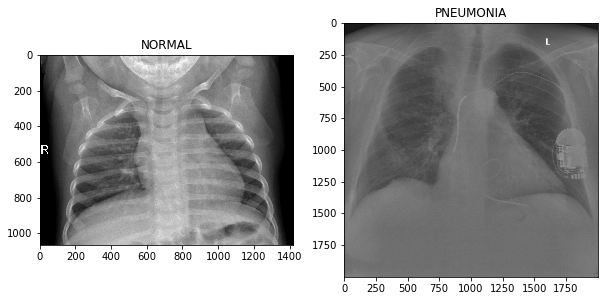

In [10]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc

img_name = 'NORMAL2-IM-1056-0001.jpeg'
img_normal = load_img('../COVID_19/Dataset/Train/NORMAL/' + img_name)

img_name_1 = 'f6d980a0.jpg'
img_pneumonia = load_img('../COVID_19/Dataset/Train/Covid/' + img_name_1)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")
axs[1].imshow(img_pneumonia)
axs[1].set_title("PNEUMONIA");

## Assemble CNN model

In [43]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Metrics

In [88]:
metr_auc = tensorflow.keras.metrics.AUC(
        num_thresholds=200, curve='ROC')

TP = tensorflow.keras.metrics.TruePositives(thresholds=None, name=None, dtype=None)
TN = tensorflow.keras.metrics.TrueNegatives(thresholds=None, name=None, dtype=None)
FP = tensorflow.keras.metrics.FalsePositives(thresholds=None, name=None, dtype=None)
FN = tensorflow.keras.metrics.FalseNegatives(thresholds=None, name=None, dtype=None)

Recall_metr = tensorflow.keras.metrics.Recall(
                thresholds=None, top_k=None, 
                class_id=None, name=None, dtype=None)
mtr_list = ['accuracy','mse', metr_auc,TP,TN,FP,FN]

In [89]:
model.compile(loss=keras.losses.binary_crossentropy,
             optimizer='adam', 
              metrics=mtr_list)


model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 54, 54, 64)      

### Prepare the data

In [69]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [70]:
train_generator = train_datagen.flow_from_directory(
    '../COVID_19/Dataset/Train/',
    target_size =(224,224),
    batch_size = 32,
    class_mode ='binary')

Found 332 images belonging to 2 classes.


In [47]:
validation_generator = test_dataset.flow_from_directory(
    '../COVID_19/Dataset/val/',
    target_size =(224,224),
    batch_size = 32,
    class_mode ='binary')

Found 60 images belonging to 2 classes.


## Show some images after data augmentation

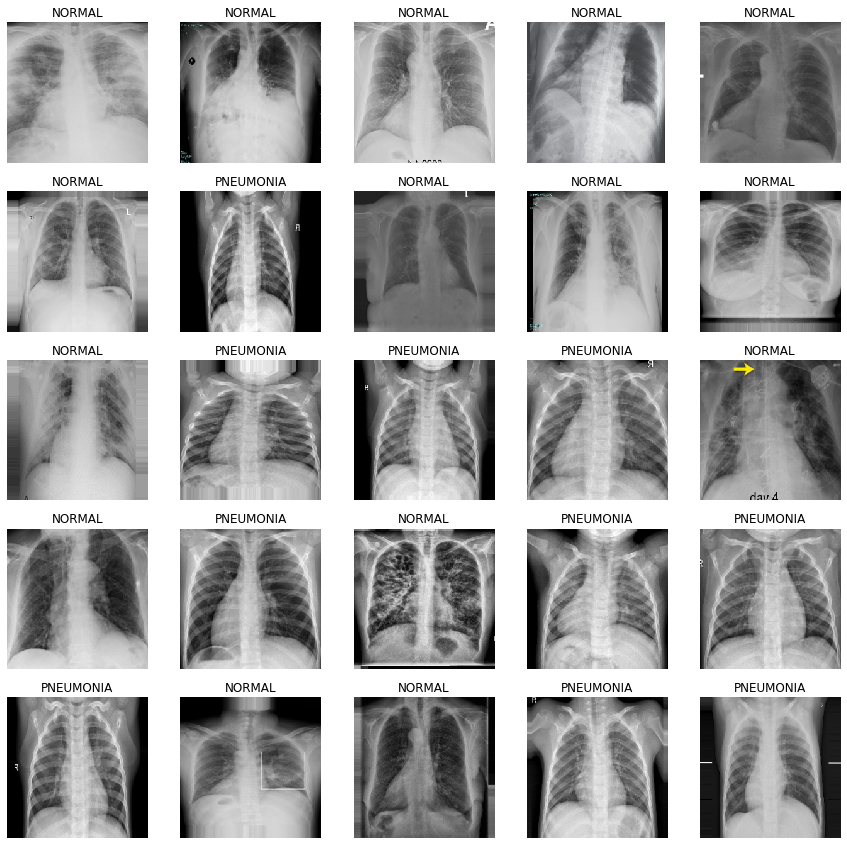

In [48]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc
image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15, 15))
    for n in range(25):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch(image_batch, label_batch)

## Train the CNN model

In [83]:
model_history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data =validation_generator,
    validation_steps=2)

Epoch 1/10
8/8 [==============================] - 12s 2s/step - loss: 0.2964 - accuracy: 0.9407 - mse: 0.0580 - auc_2: 0.9630 - true_positives: 112.0000 - true_negatives: 110.0000 - false_positives: 4.0000 - false_negatives: 10.0000 - val_loss: 0.0456 - val_accuracy: 0.9833 - val_mse: 0.0139 - val_auc_2: 1.0000 - val_true_positives: 30.0000 - val_true_negatives: 29.0000 - val_false_positives: 1.0000 - val_false_negatives: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 13s 2s/step - loss: 0.1683 - accuracy: 0.9280 - mse: 0.0493 - auc_2: 0.9864 - true_positives: 117.0000 - true_negatives: 102.0000 - false_positives: 13.0000 - false_negatives: 4.0000 - val_loss: 0.0769 - val_accuracy: 0.9833 - val_mse: 0.0194 - val_auc_2: 1.0000 - val_true_positives: 30.0000 - val_true_negatives: 29.0000 - val_false_positives: 1.0000 - val_false_negatives: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 12s 1s/step - loss: 0.1562 - accuracy: 0.9407 - mse: 0.0460 - auc_2: 0.9849 

## Plot the History

In [87]:
# list all data in history
print(len(model_history.history.keys()),'\n\n')
print(model_history.history.keys())

16 


dict_keys(['loss', 'accuracy', 'mse', 'auc_2', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_mse', 'val_auc_2', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])


In [97]:
model_history_df = pd.DataFrame(model_history.history)
model_history_df

,loss,accuracy,mse,auc_2,true_positives,true_negatives,false_positives,false_negatives,val_loss,val_accuracy,val_mse,val_auc_2,val_true_positives,val_true_negatives,val_false_positives,val_false_negatives
0,0.296435,0.940678,0.058029,0.963043,112.0,110.0,4.0,10.0,0.045642,0.983333,0.013946,1.0,30.0,29.0,1.0,0.0
1,0.168251,0.927966,0.049254,0.986418,117.0,102.0,13.0,4.0,0.076928,0.983333,0.019430,1.0,30.0,29.0,1.0,0.0
2,0.156217,0.940678,0.046028,0.984891,115.0,107.0,6.0,8.0,0.070657,0.983333,0.011738,1.0,30.0,29.0,1.0,0.0
3,0.107936,0.966102,0.025856,0.990268,113.0,115.0,4.0,4.0,0.039709,0.983333,0.007216,1.0,30.0,29.0,1.0,0.0
4,0.080068,0.974576,0.022604,0.996333,112.0,118.0,4.0,2.0,0.038594,0.983333,0.011754,1.0,30.0,29.0,1.0,0.0
5,0.074496,0.978814,0.017410,0.993608,115.0,116.0,3.0,2.0,0.040294,0.983333,0.013125,1.0,30.0,29.0,1.0,0.0
6,0.071163,0.970339,0.016544,0.994325,114.0,115.0,5.0,2.0,0.035489,0.983333,0.012393,1.0,30.0,29.0,1.0,0.0
7,0.138469,0.961864,0.033585,0.987037,111.0,116.0,2.0,7.0,0.057020,0.983333,0.015080,1.0,30.0,29.0,1.0,0.0
8,0.100276,0.976562,0.025717,0.993164,126.0,124.0,3.0,3.0,0.053034,0.983333,0.013972,1.0,30.0,29.0,1.0,0.0
9,0.126877,0.961864,0.032877,0.987790,116.0,111.0,6.0,3.0,0.044669,0.983333,0.012365,1.0,30.0,29.0,1.0,0.0


In [109]:
model_history_df.columns

Index(['loss', 'accuracy', 'mse', 'auc_2', 'true_positives', 'true_negatives',
       'false_positives', 'false_negatives', 'val_loss', 'val_accuracy',
       'val_mse', 'val_auc_2', 'val_true_positives', 'val_true_negatives',
       'val_false_positives', 'val_false_negatives'],
      dtype='object')

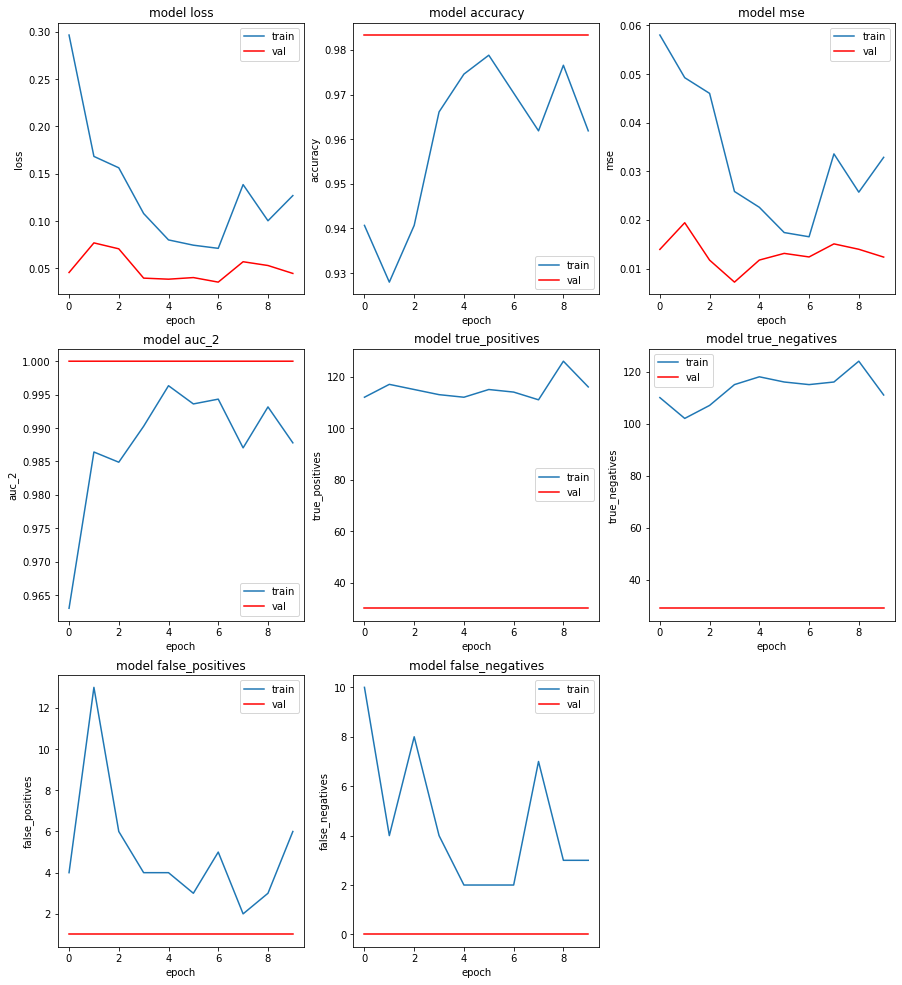

In [119]:
plt.figure(figsize=(15,17))
columns = ['loss', 'accuracy', 'mse', 'auc_2', 'true_positives', 'true_negatives',
           'false_positives', 'false_negatives']
for i,col in enumerate(columns):
    
    plt.subplot(3, 3, i+1)
    
    plt.plot(model_history_df[col])
    plt.plot(model_history_df['val_'+col], color='red')
    plt.title('model '+col)
    plt.ylabel(col)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])

In [117]:
# plt.figure(figsize=(12,10))

# plt.subplot(2, 2, 1)
# # summarize history for accuracy
# plt.plot(model_history.history['accuracy'])
# plt.plot(model_history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# # plt.show()


# plt.subplot(2, 2, 2)
# # summarize history for loss
# plt.plot(model_history.history['loss'])
# plt.plot(model_history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# # plt.show()


# plt.subplot(2, 2, 3)
# # summarize history for loss
# plt.plot(model_history.history['loss'])
# plt.plot(model_history.history['val_mse'])
# plt.title('model mse')
# plt.ylabel('mse')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# # plt.show()

In [120]:
model.save("model_covid_test.h5")